In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
import cv2
import os

IMAGES_PATH = 'Image'
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def load_images(path, size=(100,100)):
    X, y = [], []
    paths = []
    for person in os.listdir(path):
        folder = os.path.join(path, person)
        for file in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, size)
            X.append(img.flatten())
            y.append(person)
            paths.append(os.path.join(folder,file))
    return np.array(X), np.array(y),paths 

In [3]:
X,y,paths = load_images('Datasets/archive')

GIẢM CHIỀU DỮ LIỆU BẰNG PCA 

In [4]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self,X):
        # normalize data
        self.mean = np.mean(X,axis = 0)
        X_centered = X - self.mean

        # Using Singular Value Decomposition
        U,S,V_t = np.linalg.svd(X_centered,full_matrices=True)

        # Get K-Principal components
        self.components = V_t.T[:self.n_components]
    
    def transform(self,X):
        X_centered = X - self.mean
        return np.dot(X_centered,self.components.T)
 
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)
    
    def recontruct_image(self,X):
        return X @ self.components + self.mean
        


In [5]:
pca = PCA(n_components = 3000)
X_pca = pca.fit_transform(X)
print("Kích thước sau PCA:", X_pca.shape)

Kích thước sau PCA: (400, 3000)


Saving figure after_pca


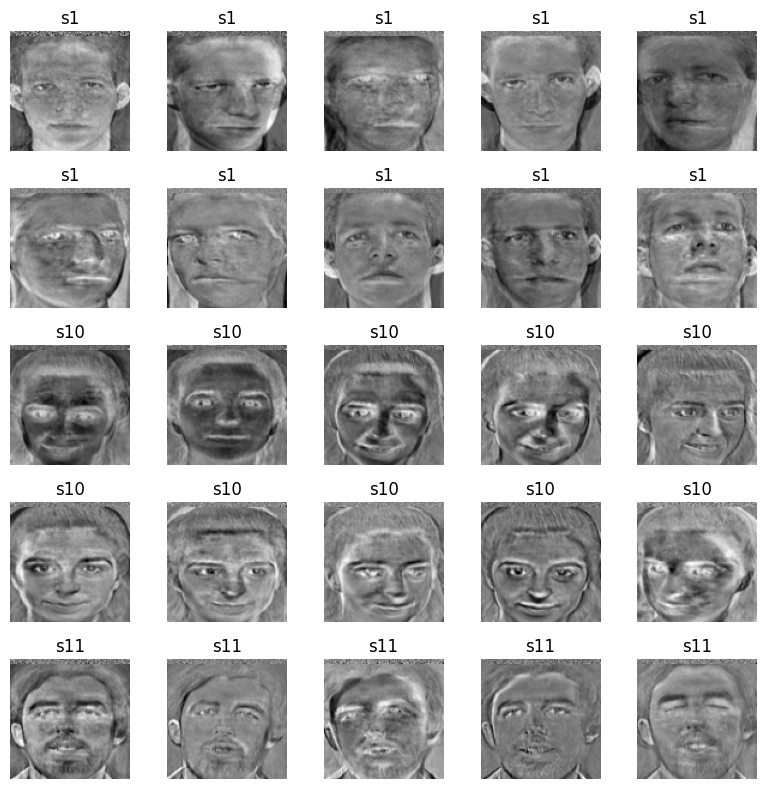

In [6]:
faces = pca.components.reshape((pca.n_components, 100, 100))
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i], cmap='gray')
    ax.set_title(f"{y[i]}")
    ax.axis('off')
save_fig('after_pca')
plt.show()

In [7]:
from  pathlib import Path

LƯU FACE VECTORS LẠI ĐỂ ĐƯA VÀO MÔ HÌNH SVM

In [12]:
base_dirs = 'Datasets/PCA_vectors'
os.makedirs(base_dirs,exist_ok=True)

for i,label in enumerate(y):
    person_dir = os.path.join(base_dirs,label)
    os.makedirs(person_dir,exist_ok = True)
    np.save(os.path.join(person_dir,f"vector_{i}.npy"),X_pca[i])

LƯU DỮ LIỆU LẠI MỘT THƯ MỤC MỚI

In [10]:
src_root = Path('Datasets/archive')
save_root = Path('Datasets/PCA_data_viewing')
X_reconstructed = pca.recontruct_image(X_pca)
os.makedirs(save_root, exist_ok = True)

In [11]:
ok = True
for i,path in enumerate(paths):
    path = Path(path)
    person_folder = path.parent.name
    file_name = path.name
    # save_dir 
    save_dir = save_root/person_folder
    save_dir.mkdir(parents = True,exist_ok = True)

    # get_image 
    img = X_reconstructed[i].reshape(100,100)
    img = np.clip(img,0,255).astype(np.uint8)

    # Save_image with .png
    save_path = save_dir / (file_name.replace('.pgm','.png'))
    try:
        cv2.imwrite(str(save_path),img)
    except:
        print(f'Problem at {path}')
        ok = False

if ok : print("Saving successfully")

Saving successfully


In [ ]:
img = cv2.imread('PCA_data/s1/1.png',cv2.IMREAD_GRAYSCALE)
img.shape

(100, 100)